In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import hdbscan
from wordcloud import WordCloud
from IPython.display import display

sns.set()

ModuleNotFoundError: No module named 'umap'

In [2]:
DATA_PATH = "../data"
wc = WordCloud()

In [3]:
with open(DATA_PATH + '/vectors.npy', 'rb') as f:
    vectors = np.load(f)

In [4]:
articles = pd.read_csv(DATA_PATH + '/health_cng_preprocessed.csv')
articles.head()

,link,text
0,https://api.elsevier.com/content/article/pii/S...,assessing safety gas petrol electric vehicles ...
1,https://api.elsevier.com/content/article/pii/S...,accumulation primary energy natural gas hydrat...
2,https://api.elsevier.com/content/article/pii/S...,possibility simulate operation engine using al...
3,https://api.elsevier.com/content/article/pii/S...,compressive strength natural hydraulic lime mo...
4,https://api.elsevier.com/content/article/pii/S...,hybrid energy storage system using compressed ...


In [11]:
mask = articles['text'].apply(lambda text: "gas" and "health" in text).values
articles_filtered = articles[mask]
vectors_filtered = vectors[mask]

In [13]:
reducer = umap.UMAP(n_components=2)
vectors_short = reducer.fit_transform(vectors_filtered)

<AxesSubplot:>

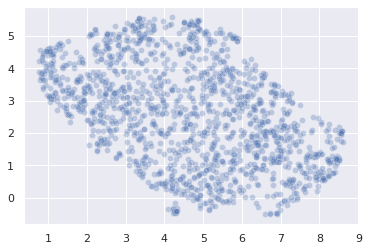

In [14]:
sns.scatterplot(x=vectors_short[:, 0], y=vectors_short[:, 1], alpha=.3)

<AxesSubplot:>

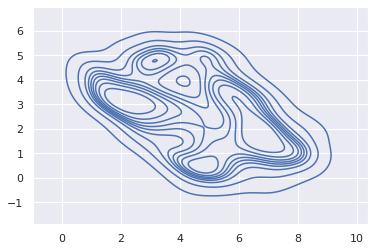

In [15]:
sns.kdeplot(x=vectors_short[:, 0], y=vectors_short[:, 1])

In [21]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = clusterer.fit_predict(vectors_short)

cluster_labels.max()

18

In [22]:
articles_filtered['label'] = cluster_labels

<ipython-input-22-0494cd0d7f40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_filtered['label'] = cluster_labels


In [25]:
articles_filtered['text']

13      regulating particle number measurements tailpi...
16      natural gas industry china development situati...
26      systemic impact transition fuel natural gas he...
27      use benchscale high pressure apparatus evaluat...
36      expected impacts greenhouse gas air pollutant ...
                              ...                        
5775    breakthrough caprock sealing efficiency integr...
5776    bioactive polymeric scaffolds tissue engineeri...
5778    experiment quality control vegetable storage b...
5779    yeast genetic screen reveals critical role por...
5781    sustainable development microalgal biotechnolo...
Name: text, Length: 1459, dtype: object

Wordcloud for category #-1


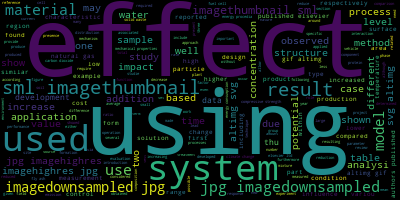

Wordcloud for category #0


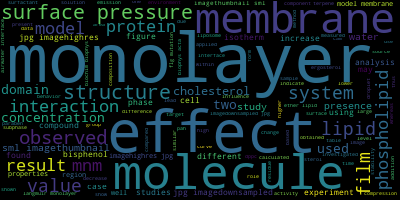

Wordcloud for category #1


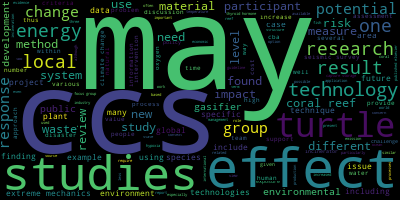

Wordcloud for category #2


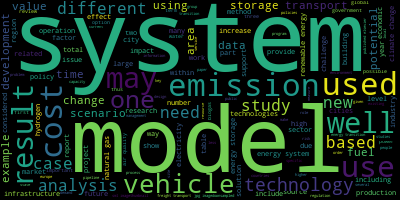

Wordcloud for category #3


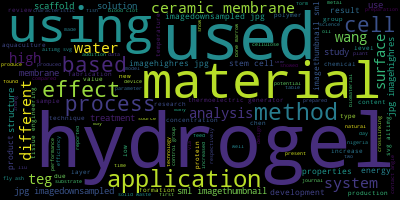

Wordcloud for category #4


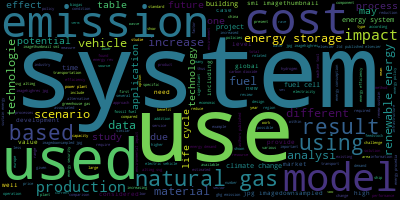

Wordcloud for category #5


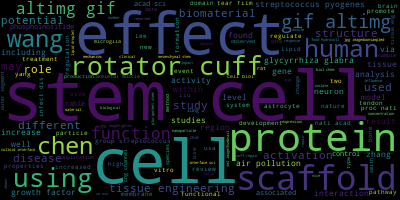

Wordcloud for category #6


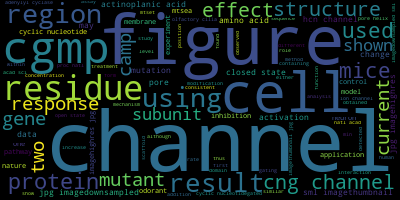

Wordcloud for category #7


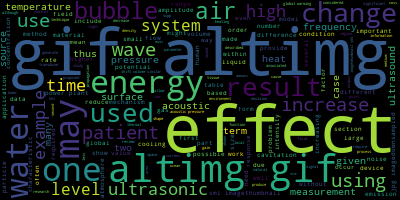

Wordcloud for category #8


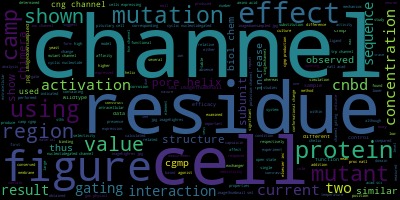

Wordcloud for category #9


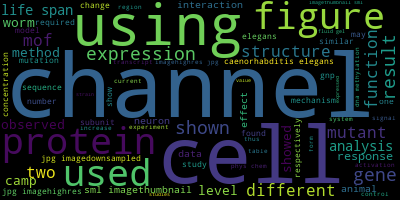

Wordcloud for category #10


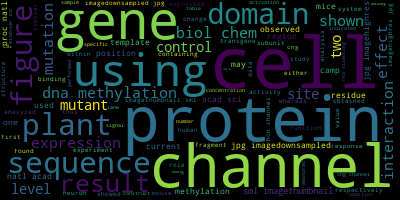

Wordcloud for category #11


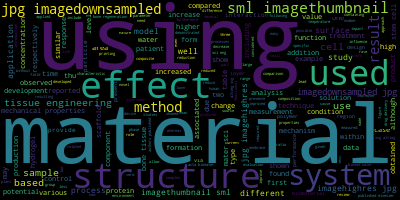

Wordcloud for category #12


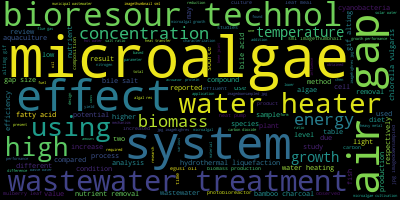

Wordcloud for category #13


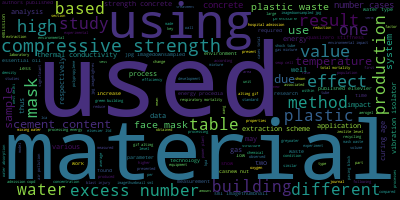

Wordcloud for category #14


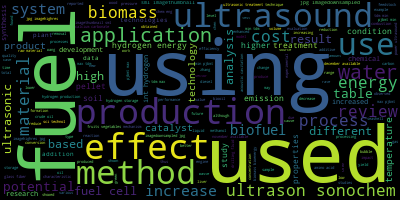

Wordcloud for category #15


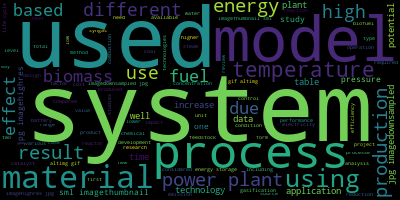

Wordcloud for category #16


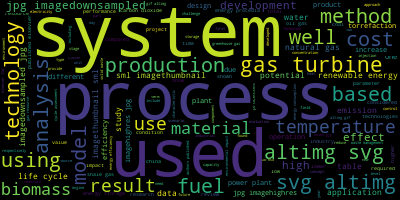

Wordcloud for category #17


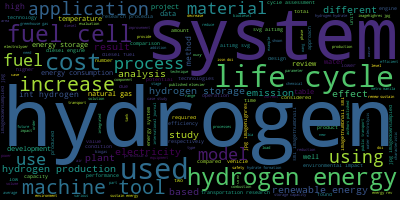

Wordcloud for category #18


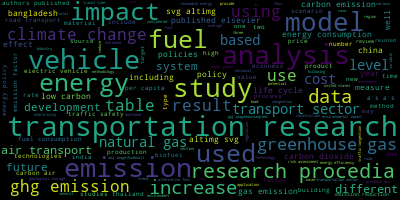

In [23]:
for c in np.unique(cluster_labels):
    print("Wordcloud for category #{}".format(c))
    display(wc.generate(" ".join(articles_filtered['text'][cluster_labels == c])).to_image())